In [1]:
import glob
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
import tqdm

In [2]:
data_folder = '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/'
dates = ['20230318', '20230319']

In [3]:
scan_files = sorted(glob.glob(os.path.join(data_folder, '*.cdf')))

In [4]:
scan_files

['/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.000025.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.000342.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.001514.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.001834.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.003010.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.003336.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.004513.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.004834.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230301.010023.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1

In [5]:
scan_files = sorted(glob.glob(os.path.join(
    '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/', '*.cdf')))
scan_files = [f for f in scan_files if '20230302' in f or '20230303' in f]
scan_files = [f for f in scan_files if f[-8: -6] in [
    # '15', '18', '45', '48',
    '00', '03', '30', '33'
]]
len(sorted(scan_files))

192

# SAVE A BUNCH OF IMAGES

In [ ]:
for f in sorted(scan_files):
    try: 
        ds = xr.open_dataset(f)
        ds['x'] = ds['range']*np.cos(np.deg2rad(ds['elevation']))
        ds['z'] = ds['range']*np.sin(np.deg2rad(ds['elevation']))
        ds['x'] = - ds['x']
        df = ds.to_dataframe().reset_index()
        src = ds.sel(range=slice(0,2000))
        plt.subplots(figsize=(9.6, 4))
        plt.contourf(
            src['x'].values.T, src['z'].values.T,
            src['radial_velocity'].values,
            cmap='gist_ncar',
            levels=50
        )
        plt.colorbar()
        plt.gca().set_aspect('equal')
        name = f.split('gucdlrhiM1.b1/gucdlrhiM1.b1.')[1][:-4]
        plt.title(name)
        print(name)
        plt.savefig('rhi_scans/' + name + '.png')
        plt.close()
    except Exception as exc:
        print(f'Failed on {f}')

# OPen scans in march

In [78]:
scan_files[144:180]

['/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.120023.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.120340.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.123005.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.123335.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.130024.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.130340.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.133005.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.133336.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.140023.cdf',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1

In [128]:
df_list = []
for f in tqdm.tqdm(scan_files[144:172]):
    try:
        ds = xr.open_dataset(f)
        ds['scan_date'] = f.split('gucdlrhiM1.b1/gucdlrhiM1.b1.')[1][:-4]
        ds['x'] = ds['range']*np.cos(np.deg2rad(ds['elevation']))
        ds['z'] = ds['range']*np.sin(np.deg2rad(ds['elevation']))
        ds['x'] = - ds['x']
        df = ds.to_dataframe().query("z <= 1000")
        df_500 = df[(df['x'] > 950) & (df['x'] < 1050)]
        df_list.append(df_500)
    except Exception as E:
        print(f, E)
        continue 

  0%|          | 0/28 [00:00<?, ?it/s]

 75%|███████▌  | 21/28 [00:00<00:00, 35.23it/s]

/Users/elischwat/Development/data/sublimationofsnow/gucdlrhiM1.b1/gucdlrhiM1.b1.20230303.160340.cdf did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfradial1', 'datamet', 'furuno', 'gamic', 'gini', 'hpl', 'iris', 'metek', 'nexradlevel2', 'odim', 'rainbow', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html


100%|██████████| 28/28 [00:00<00:00, 33.03it/s]


In [129]:
df_500 = pd.concat(df_list)

In [130]:
df_500['snr'] = df_500.intensity - 1
df_500 = df_500.query("snr > 0.008")

In [131]:
src = df_500[['radial_velocity', 'z', 'scan_date']].reset_index()
src = src[ src['radial_velocity'] < 5]
# src = src[src.scan_date.isin(
#     pd.Series(src.scan_date.unique()).head(8)
# )]

In [132]:
src['z_group'] = pd.cut(
    src['z'],
    bins = np.arange(0,1010,20)
).apply(lambda rang: 0.5*(rang.left + rang.right))

In [134]:

alt.Chart(
    src.assign(scan_date = src.scan_date.str[9:-2]).query("radial_velocity > -5")
).mark_line().encode(
    alt.X('mean(radial_velocity):Q').title('Radial velocity (m/s)'),
    alt.Y('z_group:Q').title('Height AGL (m)'),
    alt.Color('hours(time):O').scale(scheme='category20'),
    order='z_group:Q'
).properties(width=200)

alt.Chart(...)

In [139]:
import act

In [143]:
# Inputs
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")
DATE_FORMAT_STR = '%Y-%m-%d'
start_date = "20230303"
end_date = "20230305"

data_dir = "/Users/elischwat/Development/data/sublimationofsnow/"
DLW_DATA_STREAM = 'gucdlprofwstats4newsM1.c1'
DLW_DATA_STREAM_FILEEXT = '.cdf'
DLW_OUTPUT_DIR = os.path.join(data_dir, DLW_DATA_STREAM)
file_list = act.discovery.download_arm_data(
            username, token, DLW_DATA_STREAM, start_date, end_date, output = DLW_OUTPUT_DIR)
file_list

[DOWNLOADING] gucdlprofwstats4newsM1.c1.20230303.000000.nc
[DOWNLOADING] gucdlprofwstats4newsM1.c1.20230304.000000.nc

If you use these data to prepare a publication, please cite:

Shippert, T., Newsom, R., Riihimaki, L., & Zhang, D. Doppler Lidar Vertical
Velocity Statistics (DLPROFWSTATS4NEWS), 2023-03-03 to 2023-03-05, ARM Mobile
Facility (GUC), Gunnison, CO; AMF2 (main site for SAIL) (M1). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1178583



['/Users/elischwat/Development/data/sublimationofsnow/gucdlprofwstats4newsM1.c1/gucdlprofwstats4newsM1.c1.20230303.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/gucdlprofwstats4newsM1.c1/gucdlprofwstats4newsM1.c1.20230304.000000.nc']

In [145]:
from sublimpy import utils

In [146]:
dl_wstats = xr.open_mfdataset(file_list)
dl_wstats = utils.modify_xarray_timezone(
    dl_wstats,
    'UTC',
    'US/Mountain'
)

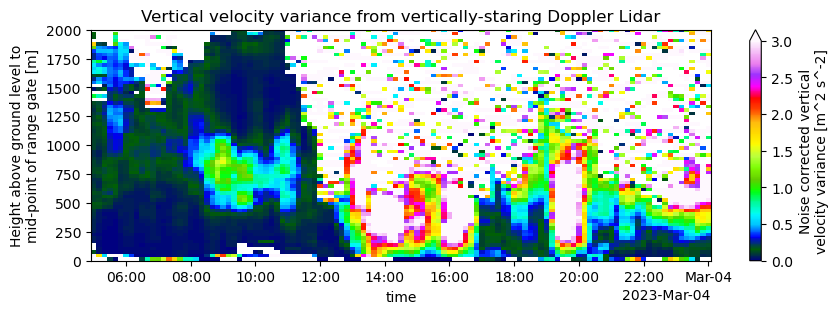

In [149]:

dl_wstats['w_variance'].sel(
    time = slice('20230303 0500', '20230304 0000')
).plot(x = 'time', y='height', figsize=(10,3), cmap='gist_ncar', vmin=0, vmax=3)
plt.title('Vertical velocity variance from vertically-staring Doppler Lidar')
plt.ylim(0,2000)
plt.show()